## Data contains power for multiple ACs at some hotel in Gurgaon.
Identify patterns/trends in the data?

Which AC was used the most/least?

Optional (Bonus questions):

Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?

Using the power data, predict/forecast the power consumption?

## Importing Necessary Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as mpatches

## Loading the Dataset

In [2]:
df=pd.read_csv('AC_Data.csv')
df

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, Here We have 87840 rows and 19 columns present in the dataset.

## Analysing the Patterns and cleaning

In [4]:
# Checking Top 5 heads of the dataset
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [5]:
# Checking Bottom 5 of the datasets
df.tail()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87839,2019-09-30 23:59:00,1.430442,6.078281,1.891162,0.000000,1.577491,4.364239,3.126339,3.287224,3.986978,2.013912,4.821829,3.363855,3.380110,1.949240,4.026304,1.862166,3.009434,7.179719


In [6]:
# Checking Datatypes
df.dtypes

0         object
AC 1     float64
AC 2     float64
AC 3     float64
AC 4     float64
AC 5     float64
AC 6     float64
AC 7     float64
AC 8     float64
AC 9     float64
AC 10    float64
AC 11    float64
AC 12    float64
AC 13    float64
AC 14    float64
AC 15    float64
AC 16    float64
AC 17    float64
AC 18    float64
dtype: object

So first column is of Object data type and remaining column is of float data type.

In [7]:
# Checking Null values
df.isnull().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

So here except first column there is null values are present in every column in large amount ,So if we apply fillna for filling the null values then data will be not able to predict perfect prediction , so here dropping of null values are necesaary.

## Handling Null values Present in the dataset

In [8]:
# Dropping Null values
df.dropna(inplace=True)

In [9]:
df

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87831,2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
87833,2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


Now We have 34642 rows and 19 columns are presnt after dropping the null values.

In [10]:
# Checking null values again
df.isnull().sum()

0        0
AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

Heatmap of null values


<AxesSubplot:>

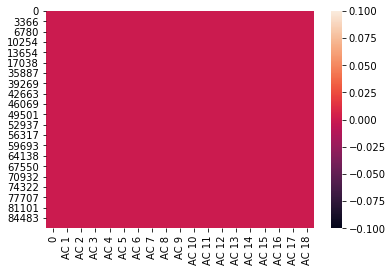

In [11]:
# checking null values through heat map
print('Heatmap of null values')
sns.heatmap(df.isnull())

So Heatmap is also showing that null values are not present in the dataset.

## Handling First column that is of Date and Time column
So, during above analysis I found that our first column is containing Date and Time and Date is same for all the ACs but Time is varrying ,so we need to extract date and time from that column.

In [12]:
## Changing the name of the column for better analysis
df.columns = df.columns.str.replace('0', 'Date_time')

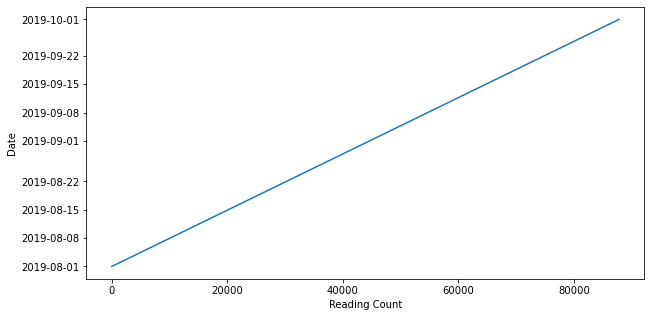

In [13]:
#Converting Date_time to timestamp ( 
df['Timestamp']=pd.to_datetime(df['Date_time'])

# Ensuring there are no temporal gaps
plt.figure(num=1, figsize=(10,5))
df.Timestamp.plot() 

#Plotting the newly added timestamp column
plt.xlabel('Reading Count')
plt.ylabel('Date')
plt.show()

we can see in graph Time vs Index curve is straight line without any gaps.

## Analysing maximum and minimum time difference between all consecutive time differnce

In [14]:
# Getting the minimum difference between two consecutive timestamps:

print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(df['Timestamp']))))

# Getting the maximum difference between two consecutive timestamps:

print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(df['Timestamp']))) )

The minimum difference between any two consecutive timestamps is: 60000000000 nanoseconds
The maximum difference between any two consecutive timestamps is: 899520000000000 nanoseconds


## Dropiing Unnecessary column that is Date_time

In [17]:
del df['Date_time']

In [18]:
df

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Timestamp
0,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01 00:00:00
2,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01 00:02:00
4,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01 00:04:00
6,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,2019-08-01 00:06:00
8,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,2019-08-01 00:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87831,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612,2019-09-30 23:51:00
87833,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333,2019-09-30 23:53:00
87835,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989,2019-09-30 23:55:00
87837,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647,2019-09-30 23:57:00


Data_time column is dropped because we have new column that is Timestamp.

## The aim of this  project is to analyse the Ac power consumption on Hourly basis so we have to resample it.

In [22]:
# Resetting the index of the dataframe
df2=df.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)

# Changing the data resolution to 1 hour.

# Since the power consumed in a hour, would be the sum of power consumed every six consecutive chunks of

# ten minumtes, (.sum()) is used to resample the data

df2=df2.resample('H').sum()
df2.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Timestamp,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,198.728663,245.941158,52.166166,26.497635,66.270805,125.635692,77.432564,140.102733,106.472332,74.252000,47.697589,57.967791,136.477574,150.751850,163.219630,123.763367,75.456003,148.799727
2019-08-01 01:00:00,222.230520,253.772243,44.703934,55.266208,67.100296,129.442455,78.308407,133.896818,91.611631,79.768370,40.995962,56.617563,153.261319,170.970917,178.268818,138.366769,77.406406,119.129358
2019-08-01 02:00:00,220.526540,243.397378,44.469689,43.961705,59.740380,126.486130,82.591836,114.041240,93.468669,84.098961,45.848432,57.599295,121.038297,150.682456,186.419658,158.015012,82.047850,118.498018
2019-08-01 03:00:00,199.178419,237.699376,67.146196,43.220318,62.731445,142.045032,91.343533,116.870897,85.345919,81.955078,33.652736,50.129603,132.015538,151.033379,148.079304,150.045078,127.160931,116.948596
2019-08-01 04:00:00,197.929595,219.027004,52.349741,76.439507,56.164297,108.017994,87.555958,113.062609,101.495620,77.929729,36.199177,55.104092,119.186004,128.498585,159.703888,144.357490,125.760260,118.132559


## Handling Timestamp column for better analysis

In [23]:
# Adding a Hour column, containing Hour and Minute part of each timestamp

df2['Hour'] = pd.to_datetime(df2.index, format='%H:%M').time

df2['Hour'] = df2.Hour.apply(lambda x: x.strftime('%H:%M'))

# df2['Date'] = df2.index.date

df2.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Hour
Timestamp,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,198.728663,245.941158,52.166166,26.497635,66.270805,125.635692,77.432564,140.102733,106.472332,74.252000,47.697589,57.967791,136.477574,150.751850,163.219630,123.763367,75.456003,148.799727,00:00
2019-08-01 01:00:00,222.230520,253.772243,44.703934,55.266208,67.100296,129.442455,78.308407,133.896818,91.611631,79.768370,40.995962,56.617563,153.261319,170.970917,178.268818,138.366769,77.406406,119.129358,01:00
2019-08-01 02:00:00,220.526540,243.397378,44.469689,43.961705,59.740380,126.486130,82.591836,114.041240,93.468669,84.098961,45.848432,57.599295,121.038297,150.682456,186.419658,158.015012,82.047850,118.498018,02:00
2019-08-01 03:00:00,199.178419,237.699376,67.146196,43.220318,62.731445,142.045032,91.343533,116.870897,85.345919,81.955078,33.652736,50.129603,132.015538,151.033379,148.079304,150.045078,127.160931,116.948596,03:00
2019-08-01 04:00:00,197.929595,219.027004,52.349741,76.439507,56.164297,108.017994,87.555958,113.062609,101.495620,77.929729,36.199177,55.104092,119.186004,128.498585,159.703888,144.357490,125.760260,118.132559,04:00


In [24]:
Hourly=df2.groupby(['Hour']).mean()
Hourly.head()


,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Hour,,,,,,,,,,,,,,,,,,
00:00,77.021956,102.497084,65.809281,62.334496,38.841297,78.831205,83.312570,82.856269,89.543154,47.128575,78.322857,85.111476,124.335361,99.186523,121.882357,88.012056,83.663416,138.302489
01:00,76.808289,102.029857,66.768045,61.820223,38.075394,80.422177,83.185411,81.234842,89.763651,45.955695,78.506496,85.938998,117.596563,98.496294,118.512356,88.037894,76.872147,115.026059
02:00,75.879932,101.783620,64.198358,61.586172,38.565677,82.387718,80.617602,81.830012,88.266125,47.165637,78.403417,86.149655,113.810476,95.585167,123.121258,84.452388,79.635476,104.730156
03:00,76.116097,99.563648,62.436492,59.797593,38.333526,80.757203,78.692539,78.738638,85.536462,46.785630,79.905857,86.695162,109.973542,93.753110,119.585730,80.932259,80.235975,103.025387
04:00,74.254564,99.211633,62.314020,57.674797,37.854556,78.624823,77.001847,76.487993,84.155539,45.528038,75.549993,83.344533,107.882179,90.399695,117.489383,79.399310,83.439191,109.512757


So, finally we plot the hourly dataframe for analysing the Ac power consumption.

## Exploratory Data Analysis with the help of groupby

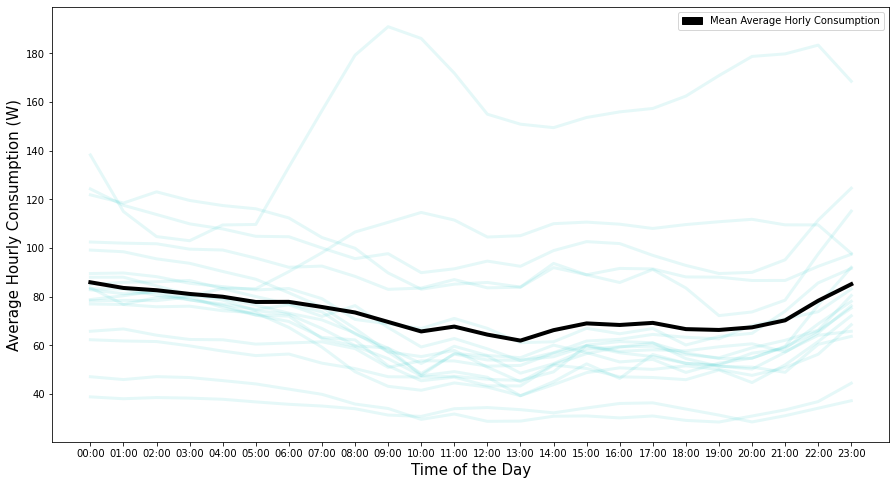

In [27]:
plt.figure(num=2, figsize=(15,8))

plt.plot(Hourly, color='c', alpha=0.1, linewidth='3')

plt.plot(Hourly.mean(axis=1),color='k', alpha=1, linewidth='4')

#plt.ylabel('Date')

plt.ylabel('Average Hourly Consumption (W)', fontsize = 15)

plt.xticks(Hourly.index)

plt.xlabel('Time of the Day', fontsize = 15)

leg= mpatches.Patch(color='black', label='Mean Average Horly Consumption')

plt.legend(handles=[leg])

plt.show()

## Season play the important role for Ac power consumpition, so I am spliiting the dataset into four season 

In [31]:
# Adding a column 'Month' to the original dataframe containing month of the corresponding dataframe
df['Month'] = df['Timestamp'].dt.month

# Making a new dataframe 'Summer' with data cooresponding to summer months
# Since summer has months from July to August 
summer = (df.Month >=6) & (df.Month <=8) 
Summer_df=df[summer].reset_index(drop=True)
Summer_df=Summer_df.drop('Month',axis=1)

# Making a new dataframe 'Rainy' with data cooresponding to fall months
# Since Rainy has months from September  to November 
Rainy = (df.Month >=9) & (df.Month <=11) 
Rainy_df=df[Rainy].reset_index(drop=True)
Rainy_df=Rainy_df.drop('Month',axis=1)

# Making a new dataframe 'Winter' with data cooresponding to winter months
 # Since winter has months from January  to February  and december
winter = (df.Month <=2) | (df.Month ==12) 
Winter_df=df[winter].reset_index(drop=True)
Winter_df=Winter_df.drop('Month',axis=1)

# Making a new dataframe 'Spring' with data cooresponding to spring months
# Since spring has months from March  to May
spring = (df.Month >=3) & (df.Month <=5) 
Spring_df=df[spring].reset_index(drop=True)
Spring_df=Spring_df.drop('Month',axis=1)



In [32]:
# Checking whether the assignment of data into the four dataframes is correct or not
print(len(Spring_df)) 
print(len(Summer_df))  
print(len(Rainy_df))
print(len(Winter_df))
len(Spring_df)+len(Summer_df)+len(Rainy_df)+len(Winter_df)==len(df) 

0
14161
20481
0


True

So Data is assigned correctly to the four new dataframe.

## Now processing the New DataFrames

### Summer

In [33]:
Summer_df.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Timestamp
0,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01 00:00:00
1,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01 00:02:00
2,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01 00:04:00
3,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,2019-08-01 00:06:00
4,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,2019-08-01 00:08:00


In [34]:
Rainy_df.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Timestamp
0,4.535695,6.020490,1.276899,4.693291,2.319947,2.104378,4.559823,3.390423,2.151931,2.460378,3.174808,4.473433,3.726813,3.656651,3.588315,1.842174,5.022187,8.039120,2019-09-01 00:01:00
1,4.513593,5.979252,1.933165,5.108592,2.079408,1.921033,3.724819,3.997065,2.535859,2.473982,3.099790,4.429871,3.745056,3.649384,3.570449,2.358337,4.997448,8.015044,2019-09-01 00:03:00
2,4.423928,5.979755,2.001497,5.073772,2.084581,1.711363,3.667965,3.593091,3.557602,2.285438,3.075326,4.307365,3.712249,3.447956,3.038965,2.110191,5.083434,8.151413,2019-09-01 00:05:00
3,4.475850,5.938977,1.537009,4.398778,2.015782,1.440092,3.690099,3.560245,3.946110,2.207763,2.622802,4.847420,3.432894,3.232471,3.063694,2.161579,5.048796,8.118794,2019-09-01 00:07:00
4,3.913330,5.962086,1.253830,4.189554,2.011610,1.425869,3.662456,3.538658,3.846165,2.153310,2.613096,4.888504,3.712800,3.222682,3.035197,1.843951,4.999856,8.036157,2019-09-01 00:09:00


In [36]:
Winter_df.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Timestamp


In [37]:
Spring_df.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Timestamp


So Data are present only in summer and rainy season.

In [38]:
def process(ds):
    ds.name = '%s'%df
    # Changing the resolution of the data to '1 hour'.
    ds=ds.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)
    ds=ds.resample('H').sum()

    # Adding a new 'Hour' column to get the hour and minutes of all corresponding timestamps
    ds['Hour'] = pd.to_datetime(ds.index, format='%H:%M').time
    ds['Hour'] = ds.Hour.apply(lambda x: x.strftime('%H:%M'))
    ds['Date'] = ds.index.date

    # Grouping the dataframe by hour to get 24 hours of the day as index (0 to 23)
    Hourly=ds.groupby(['Hour']).mean()

    # Normalizing the data by dividing all hourly electric consumptions of the given 
    # household, with largest houly consumption.
    Hourly_normalized=Hourly.apply(lambda x: (x / (np.max(x))))
    
    return Hourly_normalized

In [39]:
Summer = process(Summer_df)
Summer.name = 'Summer'
Winter = process(Winter_df)
Winter.name = 'Winter'
Rain = process(Rainy_df)
Rain.name = 'Rain'
Spring = process(Spring_df)
Spring.name = 'Spring'

Summer.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 1Date_time,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Hour,,,,,,,,,,,,,,,,,,
00:00,0.994551,1.000000,0.976530,0.913865,0.974526,0.934606,1.000000,1.000000,1.000000,1.000000,1.000000,0.951976,1.000000,1.000000,0.996770,1.000000,0.664729,0.667821
01:00,1.000000,0.971442,0.957883,0.878796,0.947403,0.960233,0.963363,0.938231,0.962398,0.926781,0.999355,0.946086,0.911540,0.986566,0.946193,0.996533,0.581205,0.538992
02:00,0.971941,0.978579,0.961093,0.963823,1.000000,1.000000,0.964316,0.950794,0.948332,0.951208,0.966434,0.973179,0.878626,0.975757,1.000000,0.974407,0.629904,0.510129
03:00,0.936698,0.945997,0.955901,0.915172,0.967094,0.935562,0.955486,0.913701,0.888516,0.948003,0.991803,1.000000,0.835479,0.992928,0.973174,0.931238,0.668672,0.471764
04:00,0.918196,0.930286,0.956558,0.898651,0.980844,0.894023,0.929091,0.904030,0.933404,0.927947,0.957817,0.939617,0.841671,0.973079,0.955985,0.918321,0.714652,0.514645


## Now Visualizing the Data

In [47]:
def visualize (ds):
    plt.figure(num=2, figsize=(15,8))
    
    plt.plot(ds, color='c', alpha=0.1, linewidth='3')
    
    plt.plot(ds.mean(axis=1),color='k', alpha=1, linewidth='4')
    
    plt.title(ds.name, fontsize = 20)
    
    plt.ylabel('Normalized Average Hourly Consumption', fontsize = 15)
    
    plt.xticks(ds.index)
    
    plt.xlabel('Time of the Day', fontsize = 
               15)
    l = mpatches.Patch(color='black', label='Mean Normalized Average Horly Consumption')
    
    plt.legend(handles=[l])
    
    plt.show()
    

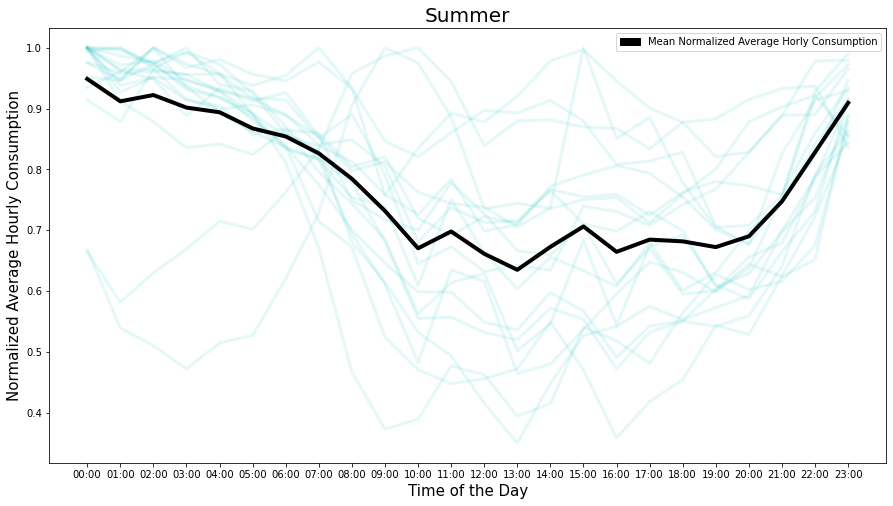

In [48]:
visualize(Summer)


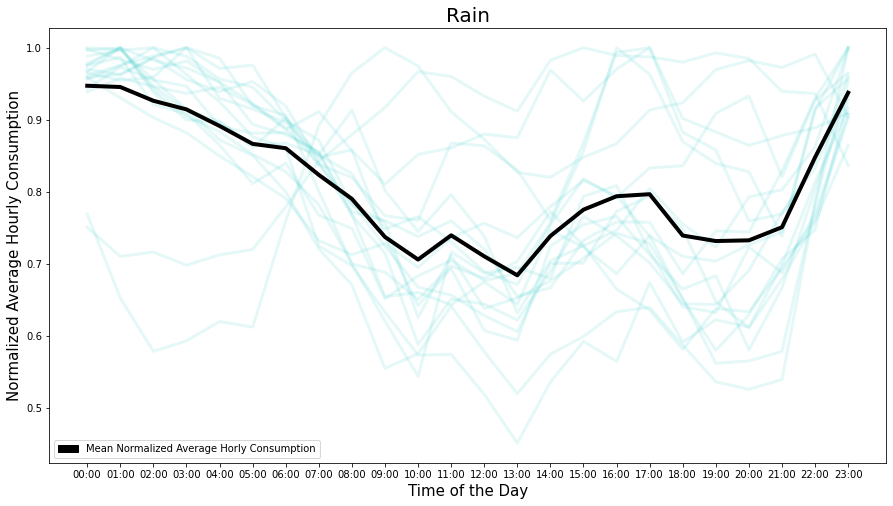

In [49]:
visualize(Rain)

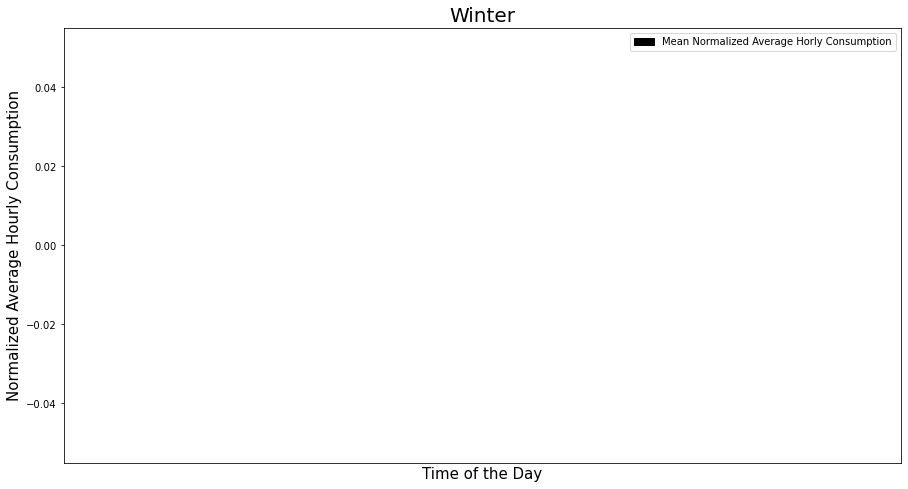

In [50]:
visualize(Winter)

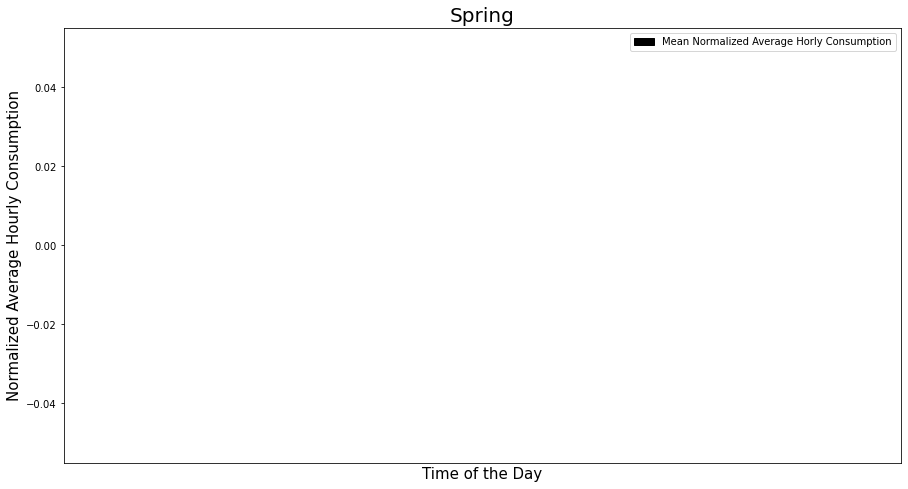

In [51]:
visualize(Spring)

So we can See Rainy season and Summer season is showing power consumptions and Rainy season is more in numbers.

## So this is Unsupervised dataset so I am apllying Clustering algorithm that is K-means clustering

### Importing k-means

In [52]:
from sklearn.cluster import KMeans

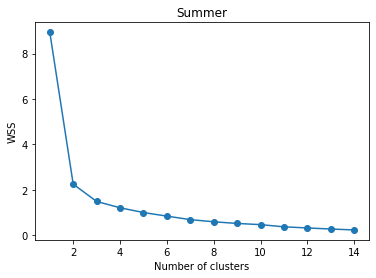

,num_clusters,WSS
0,1,8.936457
1,2,2.252367
2,3,1.491044
3,4,1.212113
4,5,1.003174
5,6,0.844833
6,7,0.690914
7,8,0.595450
8,9,0.523376
9,10,0.470063


In [53]:
S=Summer
error_summer=[]
for k in range(1,15):
    cluster1 = KMeans(n_clusters = k)
    cluster1.fit_predict(S[S.columns[0:]])
    error_summer.append(cluster1.inertia_)

clusters_summer = pd.DataFrame( { "num_clusters":range(1,15), "WSS": error_summer } )

plt.plot( clusters_summer.num_clusters, clusters_summer.WSS, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Summer')
plt.show()

clusters_summer

We can see the graph and the table is not impproved, and alsom I am choosing number of clusters is 3

## Using Elbow method for the seasonal dataset

In [57]:
def elbow(ds):
    error=[]
    for k in range(1,15):
        cluster = KMeans(n_clusters = k)
        cluster.fit_predict(ds[ds.columns[0:]])
        error.append(cluster.inertia_)

    clusters = pd.DataFrame( { "num_clusters":range(1,15), "cluster_errors": error } )

    plt.plot( clusters.num_clusters, clusters.cluster_errors, marker = "o" )
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.title(ds.name)

    plt.show()

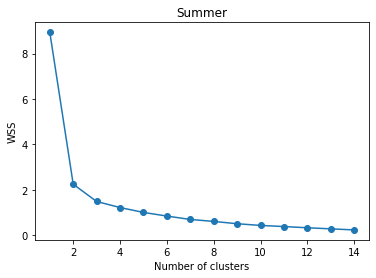

In [59]:
elbow(Summer)

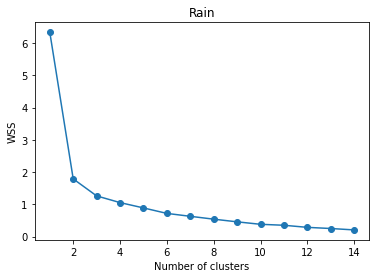

In [60]:
elbow(Rain)

So, after analysing the number of clusters should be 3 for both dataframe.

## Applying K-means clustering algorithm

In [62]:
def cluster(x):
    y=x.T 
    cluster = KMeans(n_clusters = 3)
    
    # Adding a new column 'cluster_number' containing cluster assignment (0, 1 or 2) for each household.
    y['cluster_number']=cluster.fit_predict(y[y.columns[0:]])
    y.name = x.name
    return y

In [63]:
s_cl = cluster(Summer)

r_cl = cluster(Rain)


## Clustring Assignment

In [64]:
Assignment_df = pd.DataFrame(data=None, index=s_cl.index, columns=None, dtype=None, copy=False)

Assignment_df['Summer'] = s_cl['cluster_number']

Assignment_df['Rain'] = r_cl['cluster_number']

Assignment_df.head()

,Summer,Rain
AC 1,2,0
AC 2,0,1
AC 3,0,1
AC 4,0,1
AC 5,0,1


## Now using Cluster visualization

In [65]:
def cluster_visulization(x):
    
    x_0 = x[(x.cluster_number==0)].reset_index(drop=True)
    x_0 = x_0.drop(['cluster_number'],axis=1)
    x_1 = x[(x.cluster_number==1)].reset_index(drop=True)
    x_1 = x_1.drop(['cluster_number'],axis=1)
    x_2 = x[(x.cluster_number==2)].reset_index(drop=True)
    x_2 = x_2.drop(['cluster_number'],axis=1)
    
    plt.figure(figsize=(15,8))
    plt.xlabel('Time of the Day', fontsize = 15)
    plt.ylabel('Normalized Average Power', fontsize = 15)
    plt.title(x.name, fontsize = 20)
    plt.plot((x_0).mean(), color='r')
    plt.plot(x_0.T, color = 'r', alpha = 0.03)
    plt.plot((x_1).mean(), color='b')
    plt.plot(x_1.T, color = 'b', alpha = 0.03)
    plt.plot((x_2).mean(), color='g')
    plt.plot(x_2.T, color = 'g', alpha = 0.05)
    
    c = mpatches.Patch(color='red', label='Cluster 1')
    d = mpatches.Patch(color='blue', label='Cluster 2')
    e = mpatches.Patch(color='green', label='Cluster 3')
    
    plt.legend(handles=[c,d,e])
    
    plt.show()     

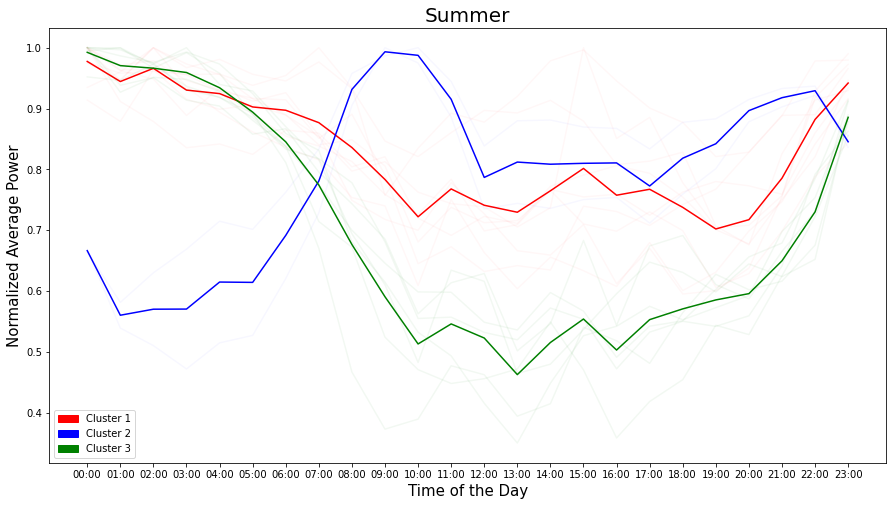

In [66]:
cluster_visulization(s_cl)

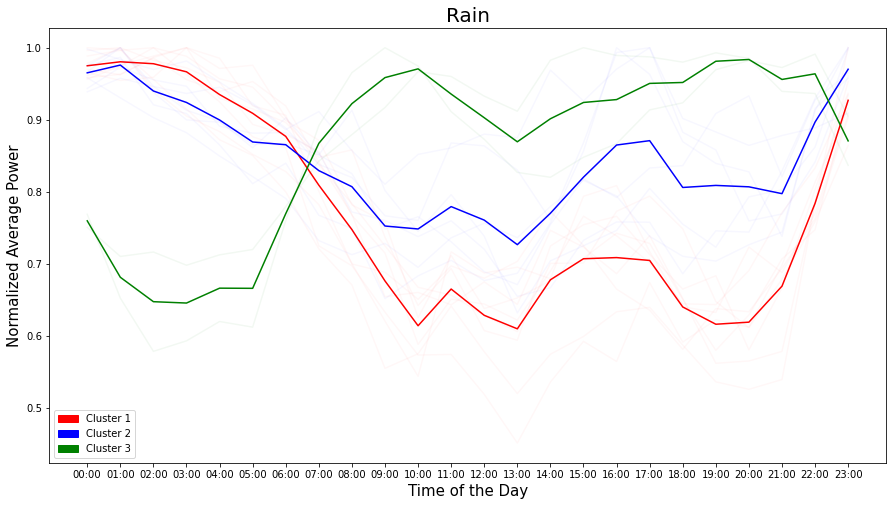

In [67]:
cluster_visulization(r_cl)

From above visualization , my conclusion is that most of the AC power is consumed in between 10am to 3pm, there is little consumption in morning.

For the summer season cluster 2 have a higher cosumption from morning to noon.

For summer and Rain Power consumption is pretty much the same.

and all the 3 clusters are not stable throughout the whole day for both the seasons.

## Applying PCA for Data Visualization

In [70]:
from sklearn.decomposition import PCA

In [71]:

def pca_accuracy (ds):
    x=ds.iloc[:,:-2].values
    y=ds.iloc[:,-1].values
    pca=PCA(n_components=2)
    principal_components=pca.fit_transform(x)
    principal_df=pd.DataFrame(data=principal_components, columns = ['Component 1', 'Component 2'])
    z = pca.explained_variance_ratio_
    return (z[0]+z[1])

In [72]:
print('Explained Variance Ratio for Summer season is', (pca_accuracy(s_cl)))

Explained Variance Ratio for Summer season is 0.8994432841774094


In [73]:
print('Explained Variance Ratio for Rainy season is', (pca_accuracy(r_cl)))

Explained Variance Ratio for Rainy season is 0.8506514096500175


In [74]:
x_component=s_cl.iloc[:,:-2].values
y_component=s_cl.iloc[:,-1].values
pca=PCA(n_components=2)
principal_components=pca.fit_transform(x_component)
principal_df=pd.DataFrame(data=principal_components, columns = ['Component 1', 'Component 2'])
y_component=pd.Series(y_component.T)
finalDf = pd.concat([principal_df, y_component], axis = 1, ignore_index=False)
finalDf=finalDf.rename(columns={0: 'target'})
finalDf.head()

,Component 1,Component 2,target
0,-0.779185,0.150756,2
1,0.180313,-0.159323,0
2,0.685110,-0.452211,0
3,0.346211,-0.192143,0
4,0.492941,-0.399148,0


finalDf is plotted to visulaize the summer season.

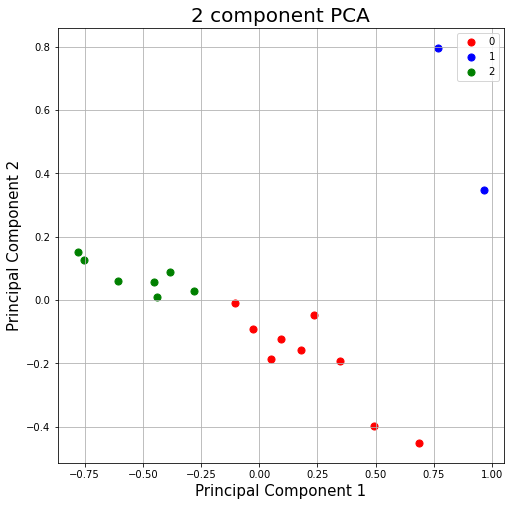

In [75]:
plt.figure(figsize=(8,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()
plt.show()

clusters with lowest euclidean distance to a given centroid are assigned to that centroid

## Exploratory Data Analysis using distribution plot and scatter plot for all the AC means all the columns

I have saved the clean AC datset in seprate csv file so I am loading it here

In [76]:
data=pd.read_csv('ac_gurgaon.csv')

In [77]:
data.head()

,Unnamed: 0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 15,AC 16,AC 17,AC 18,Hours,Minutes,Seconds,Days,Months,Years
0,0,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,5.417774,4.113460,3.305072,6.735981,0,0,0,1,8,2019
1,2,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.302422,3.986483,3.220588,6.379500,0,2,0,1,8,2019
2,4,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.539026,3.797881,3.131560,6.363475,0,4,0,1,8,2019
3,6,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,4.607439,3.062610,3.063953,6.127366,0,6,0,1,8,2019
4,8,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,5.332696,2.640150,2.864680,5.662474,0,8,0,1,8,2019


### Distribution Plot

<AxesSubplot:xlabel='AC 1', ylabel='Density'>

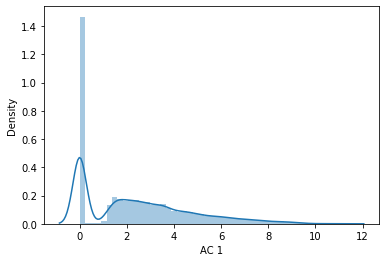

In [79]:
# AC 1
sns.distplot(data['AC 1'],kde=True)

So in AC 1 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10 with density in between 0.0 to 0.2

<AxesSubplot:xlabel='AC 2', ylabel='Density'>

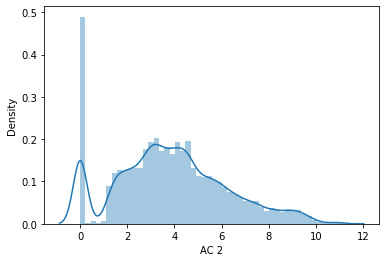

In [80]:
# AC 2
sns.distplot(data['AC 2'],kde=True)

So in AC 2 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10.2 with density in between 0.0 to approx 0.13

<AxesSubplot:xlabel='AC 3', ylabel='Density'>

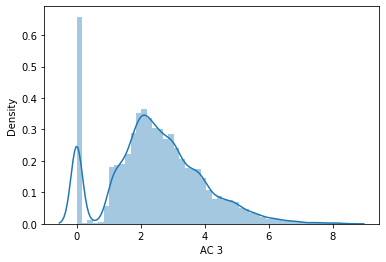

In [81]:
# AC 3
sns.distplot(data['AC 3'],kde=True)

So in AC 3 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.35

​

<AxesSubplot:xlabel='AC 4', ylabel='Density'>

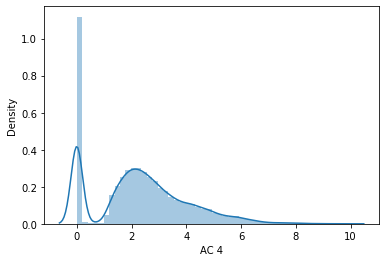

In [83]:
# AC 4
sns.distplot(data['AC 4'],kde=True)

So in AC 4 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.4

​

<AxesSubplot:xlabel='AC 5', ylabel='Density'>

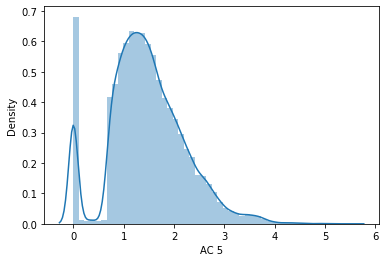

In [84]:
# AC 5
sns.distplot(data['AC 5'],kde=True)

So in AC 5 column, distribution plot is showing that most of the data is lying in the range of 0.5 to approx 4 with density in between 0.0 to approx 0.61 and some how its look like bit left skewed.

​

<AxesSubplot:xlabel='AC 6', ylabel='Density'>

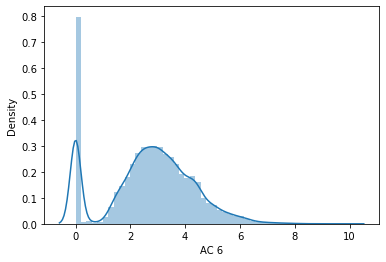

In [85]:
# AC 6
sns.distplot(data['AC 6'],kde=True)

So in AC 6 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.29.

​

<AxesSubplot:xlabel='AC 7', ylabel='Density'>

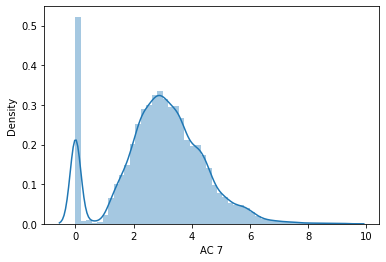

In [86]:
# AC 7
sns.distplot(data['AC 7'],kde=True)

So in AC 7 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8 with density in between 0.0 to approx 0.34 and somehow it is looking like bell shaped curve.

<AxesSubplot:xlabel='AC 8', ylabel='Density'>

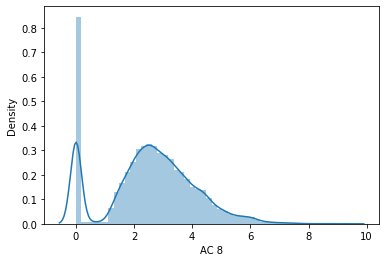

In [87]:
# AC 8
sns.distplot(data['AC 8'],kde=True)

So in AC 8 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.3

<AxesSubplot:xlabel='AC 9', ylabel='Density'>

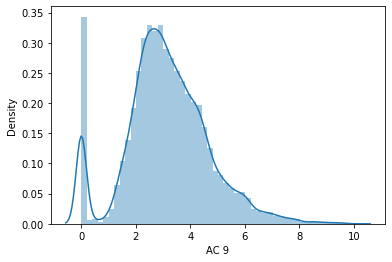

In [88]:
# AC 9
sns.distplot(data['AC 9'],kde=True)

So in AC 9 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8.2 with density in between 0.0 to approx 0.35 and somehow it is looking like bell shaped curve.

<AxesSubplot:xlabel='AC 1Date_time', ylabel='Density'>

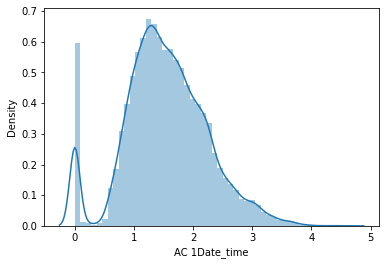

In [89]:
# AC 1Date_time
sns.distplot(data['AC 1Date_time'],kde=True)

So in AC 1Date_tim column, distribution plot is showing that most of the data is lying in the range of 1 to approx 4 with density in between 0.0 to approx 0.7 and somehow it is looking like bell shaped curve.

​

<AxesSubplot:xlabel='AC 11', ylabel='Density'>

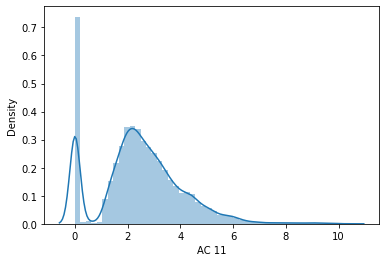

In [90]:
# AC 11
sns.distplot(data['AC 11'],kde=True)

So in AC 11 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.4

​


<AxesSubplot:xlabel='AC 12', ylabel='Density'>

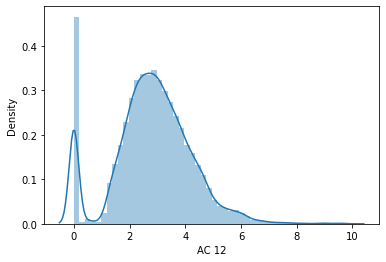

In [91]:
# AC 12
sns.distplot(data['AC 12'],kde=True)

So in AC 12 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.35

<AxesSubplot:xlabel='AC 13', ylabel='Density'>

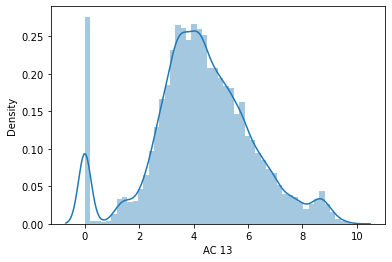

In [92]:
# AC 13
sns.distplot(data['AC 13'],kde=True)

So in AC 13 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10 with density in between 0.0 to approx 0.25 and it is looking bell shaped curve.

<AxesSubplot:xlabel='AC 14', ylabel='Density'>

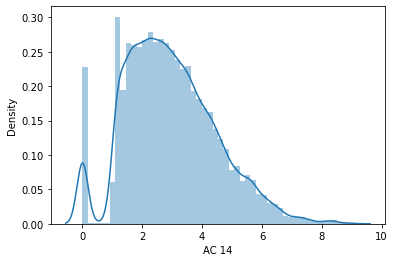

In [93]:
# AC 14
sns.distplot(data['AC 14'],kde=True)

So in AC 14 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8.3 with density in between 0.0 to approx 0.27

<AxesSubplot:xlabel='AC 15', ylabel='Density'>

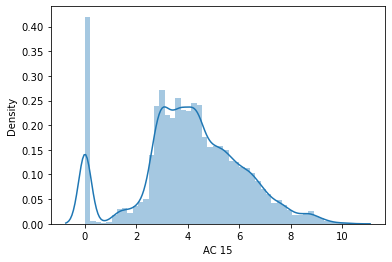

In [94]:
# AC 15
sns.distplot(data['AC 15'],kde=True)

So in AC 15 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10 with density in between 0.0 to approx 0.25 and its looking almost normally distributed.

<AxesSubplot:xlabel='AC 16', ylabel='Density'>

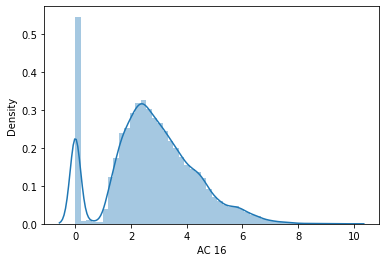

In [95]:
# AC 16
sns.distplot(data['AC 16'],kde=True)

So in AC 16 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8 with density in between 0.0 to approx 0.3

​

<AxesSubplot:xlabel='AC 17', ylabel='Density'>

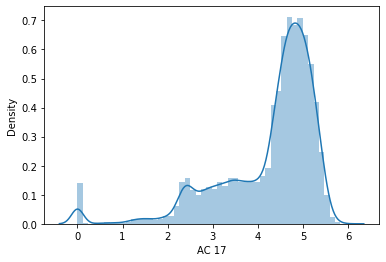

In [96]:
# AC 17
sns.distplot(data['AC 17'],kde=True)

So in AC 17 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 6 with density in between 0.0 to approx 0.7 and large amount of data in lying in right side so this is right skewed.

<AxesSubplot:xlabel='AC 18', ylabel='Density'>

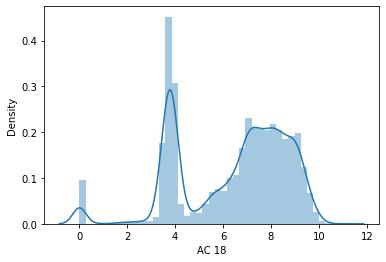

In [97]:
# AC 18
sns.distplot(data['AC 18'],kde=True)

So in AC 18 column, distribution plot is showing that most of the data is lying in the range of 2 to approx 10 with density in between 0.0 to approx 0.2 and data is not looking normally distributed.

## Checking outliers

Unnamed: 0          AxesSubplot(0.125,0.749828;0.0824468x0.130172)
AC 1             AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
AC 2             AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
AC 3             AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
AC 4             AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
AC 5             AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
AC 6             AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
AC 7             AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
AC 8                AxesSubplot(0.125,0.593621;0.0824468x0.130172)
AC 9             AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
AC 1Date_time    AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
AC 11            AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
AC 12            AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
AC 13            AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
AC 14            AxesSubplot(0.718617,0.593621;0.0824468x0.130

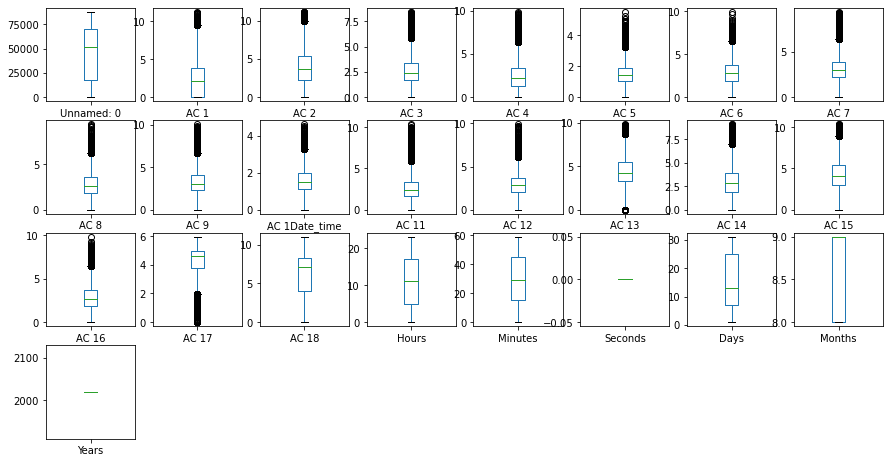

In [98]:
data.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

Outliers are present in most of the columns , let's see we have to remove it or not because we also have to take care of the important data.

## Result and Interpretation 

### patterns/trends in the data?

* So from above analysis of dataset with  the help ditribution plot and scatter plot ,I have a conclusion till here is that dataset is almost normally distributed, not much skewness is present in the dataset and relationship of ACs with Hours and Minutes is also showing much positivity, So the data is now very clean and ready to move towards further process.

### Which AC was used the most/least?

* From above calculations, analysis and visualization my conclusion is that AC13 is most used and AC1 is least used

## So For moving the further process we relate our dataset to the temprature of Gurgaon, so I have done web scrapping of a tempratutre from a website, but that data is not enough so we will use slicing to  realate our ac data to temprature data.

## Loading the temprature data

In [101]:
data2=pd.read_csv('temp.csv')

In [103]:
# Checking shape
data2.shape

(7752, 3)

So, here we have 7752 rows and 3 columns , so first one column is useless so I am dropping it.

In [105]:
# dropping column from temparture dataset
del data2['Unnamed: 0']

In [106]:
# Checking shape of Ac dataset
data.shape

(34642, 25)

So we can see in AC dataset, Number of rows is more than the rows of temprature so we will usi slicing.

## Slicing

In [127]:
new_data=data[:7752]

In [128]:
new_data.shape

(7752, 25)

In [131]:
# Adding the columns
extracted_col = data2["Next_Tmin"]
print("column to added from first dataframe to second:")
display(extracted_col)
  
new_data= new_data.join(extracted_col)
print("Second dataframe after adding column from first dataframe:")
display(new_data)

column to added from first dataframe to second:


0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64

Second dataframe after adding column from first dataframe:


,Unnamed: 0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 16,AC 17,AC 18,Hours,Minutes,Seconds,Days,Months,Years,Next_Tmin
0,0,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,...,4.113460,3.305072,6.735981,0,0,0,1,8,2019,21.2
1,2,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.986483,3.220588,6.379500,0,2,0,1,8,2019,22.5
2,4,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.797881,3.131560,6.363475,0,4,0,1,8,2019,23.9
3,6,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,...,3.062610,3.063953,6.127366,0,6,0,1,8,2019,24.3
4,8,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.640150,2.864680,5.662474,0,8,0,1,8,2019,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,16010,0.000000,4.292945,1.878265,5.711188,1.924815,6.098360,4.386346,2.233030,4.803461,...,3.316257,2.446552,7.260961,2,50,0,12,8,2019,18.1
7748,16012,0.000000,4.191813,2.194690,1.732982,1.832708,2.404675,4.245526,2.229904,4.698515,...,2.907490,2.464406,7.355162,2,52,0,12,8,2019,18.8
7749,16014,1.465018,4.232634,2.119797,2.191435,1.953544,2.554599,4.157742,2.176685,4.298894,...,3.313851,2.484794,7.370597,2,54,0,12,8,2019,17.4
7750,16016,1.632324,4.194470,2.091000,2.636139,2.196769,2.242719,4.503627,2.120747,4.214765,...,2.981679,2.468906,7.362277,2,56,0,12,8,2019,11.3


Now I have added Next_Tmin that is the  temprature column in Our AC power dataset, Now our data is ready to further process.

Here Our target varible is Next_Tmin column(Temprature), We are just relating our dataset to temprature.

In [141]:
# Checking null values
new_data.isnull().sum()

Unnamed: 0        0
AC 1              0
AC 2              0
AC 3              0
AC 4              0
AC 5              0
AC 6              0
AC 7              0
AC 8              0
AC 9              0
AC 1Date_time     0
AC 11             0
AC 12             0
AC 13             0
AC 14             0
AC 15             0
AC 16             0
AC 17             0
AC 18             0
Hours             0
Minutes           0
Seconds           0
Days              0
Months            0
Years             0
Next_Tmin        27
dtype: int64

So we have little null values in the target column so first we need to treat it.

In [142]:
# Handling null values
new_data['Next_Tmin']=new_data['Next_Tmin'].fillna(np.mean(new_data['Next_Tmin']))

In [143]:
new_data.isnull().sum()

Unnamed: 0       0
AC 1             0
AC 2             0
AC 3             0
AC 4             0
AC 5             0
AC 6             0
AC 7             0
AC 8             0
AC 9             0
AC 1Date_time    0
AC 11            0
AC 12            0
AC 13            0
AC 14            0
AC 15            0
AC 16            0
AC 17            0
AC 18            0
Hours            0
Minutes          0
Seconds          0
Days             0
Months           0
Years            0
Next_Tmin        0
dtype: int64

Null values are handled .

## Seprating the dataset into feature and target

In [144]:
x=new_data.drop('Next_Tmin',axis=1)
y=new_data['Next_Tmin']

In [145]:
x.shape

(7752, 25)

In [146]:
y.shape

(7752,)

## Lets bring all features to a common scale

In [150]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(new_data)

x=pd.DataFrame(x,columns=new_data.columns)

## Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6201, 26)
(1551, 26)
(6201,)
(1551,)


## Model Building

In [148]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score


### Linear Regression

In [152]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 4.2696700820658506e-15
mean squared error 3.198574120408703e-29
root mean squared error 5.6555937976561785e-15


In [154]:
# For Linear Regression (cross validation)


score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))


cv score 1.0


r2 score and cv score is predicting 100 % accuracy for Linear Regression means it is overfitted.

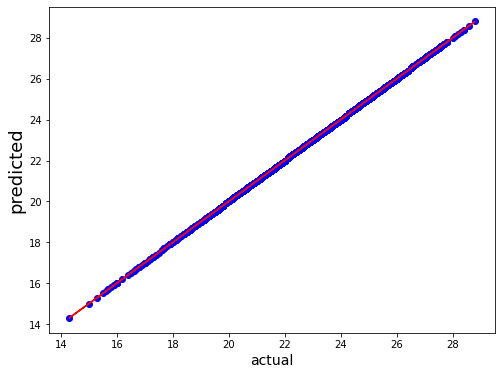

In [156]:
# Linear Regression
# graph showing the performance of the model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

Best fit line is covering all of the data points.

## Regularization Algorithm

### Lasso

In [158]:
ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))
print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.8388797168647587
error
mean absolute error 0.7829654272850934
mean squared error 0.9803199333090119
root mean squared error 0.9901110711980813


In [160]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.8025576927744925


r2 score is 83% and cv score is 80% for lasso means our model is performing well.

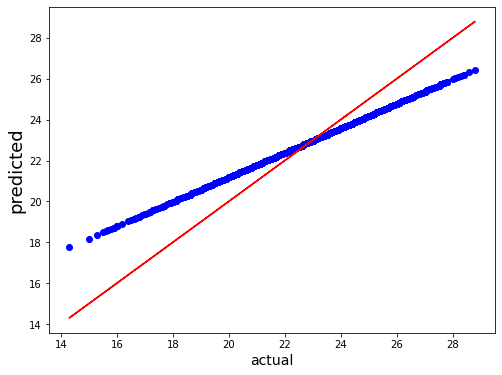

In [161]:
# Lasso
# graph showing the performance of the model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

Best fit line is covering most of the data points.

​

### Ridge

In [162]:
rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.9999999724031532
error
mean absolute error 0.00032269280782328035
mean squared error 1.6791020042146968e-07
root mean squared error 0.00040976847172698595


In [164]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999999602449595


r2 score and cv socre both is 99% for ridge.

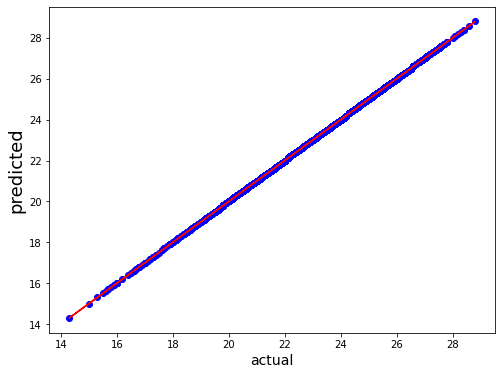

In [165]:
# ridge
# graph showing the performance of the model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

Best fit line is covering almost all of the data points.

### ElasticNet

In [166]:
en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.7823308552625136
error
mean absolute error 0.910051380804168
mean squared error 1.3243857154432301
root mean squared error 1.1508195842282274


In [167]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.7356334784060794


r2 score is 78% and cv score is 73% for Elasticnet.

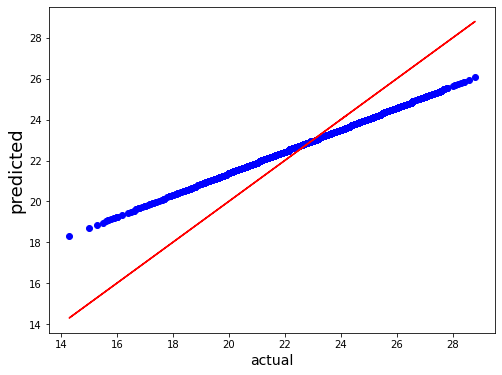

In [168]:
# elasicnet
# graph showing the performance of the model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

most of the data points is covered by best fit line.

## HYPER PARAMETER TUNING using Grid Search CV

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [171]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [172]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2 score: 99.99871560594336
cross val score: 99.98224305489536


## Saving the model

In [173]:
import pickle
filename='ac_gurgaon_temp.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Prediction on Test Data

In [174]:
y_prediction=rf.predict(x_test)

In [175]:
r2_score(y_test,y_prediction)

0.9999871560594337

## SAVING THE RESULT ON THE CSV FILE

In [176]:
result=pd.DataFrame()


result["Power Consumption/Temprature"]=y_prediction
result=result.sort_index()
result.to_csv('ac_gurgaon_temp.csv',index=True)
              

In [177]:
# Now Loding the data
ac=pd.read_csv('ac_gurgaon_temp.csv')
ac

,Unnamed: 0,Power Consumption/Temprature
0,0,24.20000
1,1,22.93222
2,2,20.40000
3,3,23.50000
4,4,24.70000
...,...,...
1546,1546,21.30000
1547,1547,22.80000
1548,1548,24.80000
1549,1549,22.20000


## Conclusion

In [179]:
loaded_model=pickle.load(open('ac_gurgaon_temp.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9999871560594337


In [180]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550
predicted,24.2,22.93222,20.4,23.5,24.7,19.8,24.6,24.0,20.4,25.1,...,21.8,25.3,23.8,19.9,19.6,21.3,22.8,24.8,22.2,24.0
original,24.2,22.93222,20.4,23.5,24.7,19.8,24.6,24.0,20.4,25.1,...,21.8,25.3,23.8,19.9,19.6,21.3,22.8,24.8,22.2,24.0


## Overall conclusion